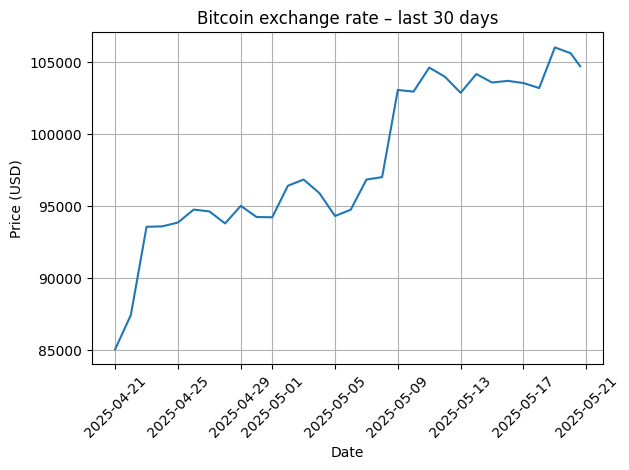

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# CoinGecko API URL (Bitcoin napi árfolyam elmúlt 30 nap)
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {"vs_currency": "usd", "days": "30", "interval": "daily"}

# API hívás
response = requests.get(url, params=params)
data = response.json()

# Árak kinyerése
prices = data["prices"]  # lista: [ [timestamp, ár], ... ]

# DataFrame létrehozása
df = pd.DataFrame(prices, columns=["timestamp", "price"])
df["date"] = pd.to_datetime(df["timestamp"], unit="ms")
df = df[["date", "price"]]

# Diagram kirajzolása
plt.plot(df["date"], df["price"])
plt.title("Bitcoin exchange rate – last 30 days")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


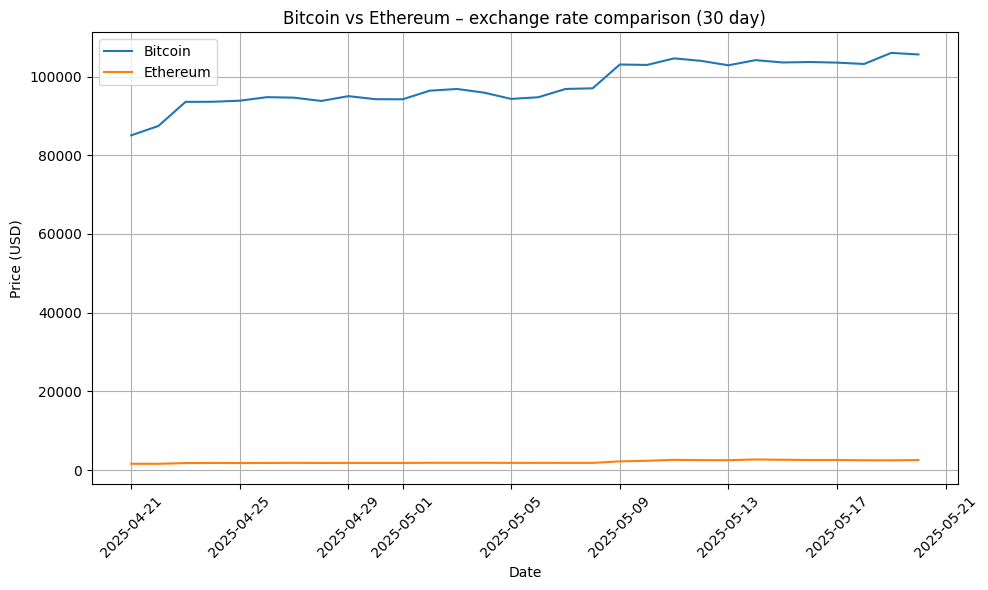

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# CoinGecko API lekérdezés függvény
def get_price_data(coin_id, currency="usd", days=30):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {"vs_currency": currency, "days": days, "interval": "daily"}
    response = requests.get(url, params=params)
    data = response.json()
    prices = data["prices"]
    df = pd.DataFrame(prices, columns=["timestamp", f"{coin_id}_price"])
    df["date"] = pd.to_datetime(df["timestamp"], unit="ms")
    return df[["date", f"{coin_id}_price"]]

# Adatok lekérése
btc_df = get_price_data("bitcoin")
eth_df = get_price_data("ethereum")

# Dátum alapján összekapcsolás
merged_df = pd.merge(btc_df, eth_df, on="date")

# Ábrázolás
plt.figure(figsize=(10, 6))
plt.plot(merged_df["date"], merged_df["bitcoin_price"], label="Bitcoin")
plt.plot(merged_df["date"], merged_df["ethereum_price"], label="Ethereum")
plt.title("Bitcoin vs Ethereum – exchange rate comparison (30 day)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


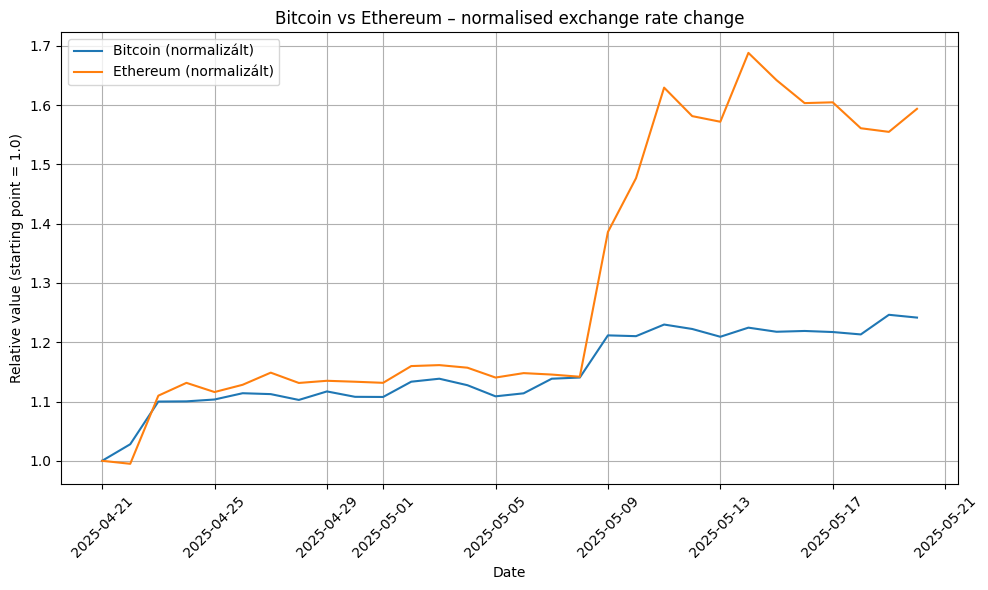

In [9]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def get_price_data(coin_id, currency="usd", days=30):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {"vs_currency": currency, "days": days, "interval": "daily"}
    response = requests.get(url, params=params)
    data = response.json()
    prices = data["prices"]
    df = pd.DataFrame(prices, columns=["timestamp", f"{coin_id}_price"])
    df["date"] = pd.to_datetime(df["timestamp"], unit="ms")
    return df[["date", f"{coin_id}_price"]]

# Adatok lekérése
btc_df = get_price_data("bitcoin")
eth_df = get_price_data("ethereum")

# Összekapcsolás dátum szerint
merged_df = pd.merge(btc_df, eth_df, on="date")

# Normalizálás: minden coin első napja = 1.0
merged_df["bitcoin_norm"] = merged_df["bitcoin_price"] / merged_df["bitcoin_price"].iloc[0]
merged_df["ethereum_norm"] = merged_df["ethereum_price"] / merged_df["ethereum_price"].iloc[0]

# Ábrázolás
plt.figure(figsize=(10, 6))
plt.plot(merged_df["date"], merged_df["bitcoin_norm"], label="Bitcoin (normalizált)")
plt.plot(merged_df["date"], merged_df["ethereum_norm"], label="Ethereum (normalizált)")
plt.title("Bitcoin vs Ethereum – normalised exchange rate change")
plt.xlabel("Date")
plt.ylabel("Relative value (starting point = 1.0)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


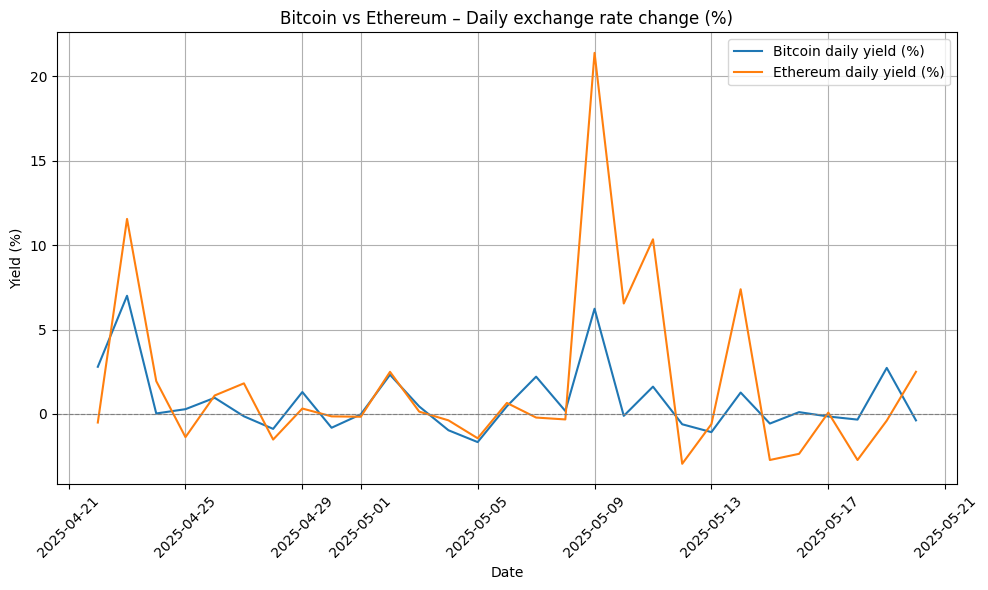

In [8]:
# Napi százalékos hozam kiszámítása
merged_df["btc_return_%"] = merged_df["bitcoin_price"].pct_change() * 100
merged_df["eth_return_%"] = merged_df["ethereum_price"].pct_change() * 100

# Ábrázolás
plt.figure(figsize=(10, 6))
plt.plot(merged_df["date"], merged_df["btc_return_%"], label="Bitcoin daily yield (%)")
plt.plot(merged_df["date"], merged_df["eth_return_%"], label="Ethereum daily yield (%)")
plt.title("Bitcoin vs Ethereum – Daily exchange rate change (%)")
plt.xlabel("Date")
plt.ylabel("Yield (%)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
